In [1]:
import numpy as np
import tensorflow as tf

/anaconda3/envs/py35/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: compiletime version 3.6 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.5
  return f(*args, **kwds)
/anaconda3/envs/py35/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot = True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [3]:
len(mnist.train.images), len(mnist.train.labels)

(55000, 55000)

In [4]:
len(mnist.test.images), len(mnist.test.labels)

(10000, 10000)

In [5]:
mnist.train.images[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [6]:
len(mnist.train.images[0])

784

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

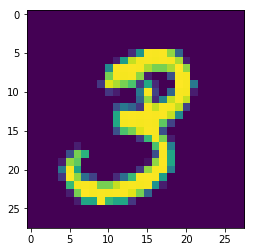

In [8]:
plt.imshow(mnist.train.images[1].reshape(28,28))

In [9]:
mnist.train.labels[1]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.])

In [10]:
x = tf.placeholder("float", shape=[None, 784])
y_ = tf.placeholder("float", shape=[None, 10])

In [11]:
x_image = tf.reshape(x, [-1, 28, 28, 1])

In [12]:
conv2d_1 = tf.contrib.layers.convolution2d(
    x_image,
    num_outputs=32,
    kernel_size=(5,5),
    activation_fn = tf.nn.relu,
    stride = (1,1),
    padding = 'SAME',
    trainable = True)

In [13]:
pool_1 = tf.nn.max_pool(conv2d_1, 
                        ksize= [1, 2,2,1],
                       strides = [1,2,2,1],
                       padding='SAME')

In [14]:
conv2d_1.get_shape()

TensorShape([Dimension(None), Dimension(28), Dimension(28), Dimension(32)])

In [15]:
pool_1.get_shape()

TensorShape([Dimension(None), Dimension(14), Dimension(14), Dimension(32)])

In [16]:
conv2d_2 = tf.contrib.layers.convolution2d(
    pool_1,
    num_outputs=64,
    kernel_size=(5,5),
    activation_fn = tf.nn.relu,
    stride = (1,1),
    padding = 'SAME',
    trainable = True)

In [17]:
pool_2 = tf.nn.max_pool(conv2d_2, 
                        ksize= [1, 2,2,1],
                       strides = [1,2,2,1],
                       padding='SAME')

In [18]:
conv2d_2.get_shape()

TensorShape([Dimension(None), Dimension(14), Dimension(14), Dimension(64)])

In [19]:
pool_2.get_shape()

TensorShape([Dimension(None), Dimension(7), Dimension(7), Dimension(64)])

In [20]:
pool2_flat = tf.reshape(pool_2, [-1, 7*7*64])

In [21]:
fc_1 = tf.contrib.layers.fully_connected(pool2_flat, 
                                        1024,
                                        activation_fn = tf.nn.relu)

In [22]:
keep_prob = tf.placeholder("float")
fc1_drop = tf.nn.dropout(fc_1, keep_prob)

In [23]:
fc_2 = tf.contrib.layers.fully_connected(fc1_drop, 
                                        10,
                                        activation_fn = tf.nn.softmax)

In [24]:
loss = -tf.reduce_sum(y_ * tf.log(fc_2))

In [25]:
train_step = tf.train.GradientDescentOptimizer(0.0001).minimize(loss)

In [26]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

In [ ]:
correct_pred = tf.equal(tf.argmax(fc_2, 1), tf.argmax(y_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

In [ ]:
for i in range(20000):
    batch = mnist.train.next_batch(50)
    sess.run(train_step, feed_dict={x : batch[0], y_:batch[1], keep_prob:0.5})
    if i%50 == 0:
        print(sess.run(loss, feed_dict={x : batch[0], y_:batch[1], keep_prob:1}))
        print(sess.run(accuracy, feed_dict={x:mnist.test.images, y_:mnist.test.labels,keep_prob:1}))
        print("--------------")

114.755585
0.0773
--------------
111.51022
0.3186
--------------
109.173744
0.5378
--------------
98.06425
0.6548
--------------
81.93743
0.6982
--------------
46.132698
0.7407
--------------
43.139786
0.7874
--------------
31.82726
0.8418
--------------
30.005209
0.8573
--------------
29.255384
0.8752
--------------
26.02791
0.8747
--------------
18.284384
0.8856
--------------
28.066277
0.8984
--------------
24.184027
0.8982
--------------
13.036492
0.9023
--------------
33.22979
0.9084
--------------
13.805885
0.9051
--------------
13.716793
0.9159
--------------
9.310038
0.914
--------------
11.859652
0.92
--------------
14.794542
0.9246
--------------
9.77744
0.9232
--------------
6.099699
0.9258
--------------
15.665421
0.9189
--------------
10.991343
0.9273
--------------
9.812216
0.9307
--------------
7.8547688
0.9357
--------------
12.281435
0.9342
--------------
7.824145
0.9326
--------------
7.7990685
0.9379
--------------
9.309114
0.9373
--------------
11.758891
0.9378
----